<a href="https://colab.research.google.com/github/Wpompeo/Wpompeo_DataScience/blob/master/DSNP_3_0_Gr%C3%A1fico_de_Pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Gráfico de Pizza

O gráfico de pizza é um diagrama circular onde o valor de cada classe é proporcional à sua respectiva medida de ângulo. Na prática isso significa que para cada 1% do valor absoluto total, tem-se 3,6º na pizza.

<center><img src="https://blog.funnel.io/hs-fs/hubfs/blog/posts/better-data-visualizations/pie-chart.png?width=1000&name=pie-chart.png" height="200px"></center>

Muitas pessoas amam colocar gráficos de pizza em todo relatório ou pesquisa. No entanto, existem diversos motivos para você evitar usar esse tipo de representação gráfica.

O motivo para isso é que gráficos de pizza nos forçam a comparar áreas ou ângulos, o que não é intuitivo para o cérebro humano. A situação piora se você quiser que uma pessoa faça uma comparação entre dois gráficos de pizza diferentes.

Só para ilustrar essa colocação, veja como é muito mais fácil para nós um gráfico de barras. Imediatamente, nosso cérebro assimila a informação passada:

<center><img src="https://blog.funnel.io/hs-fs/hubfs/blog/posts/better-data-visualizations/bar-chart.png?width=1000&name=bar-chart.png" height="200px"></center>

Se você quiser saber mais sobre os motivos para evitar gráficos de pizza, leia o artigo [***Why you shouldn’t use pie charts - Tips for better data visualization***](https://blog.funnel.io/why-we-dont-use-pie-charts-and-some-tips-on-better-data-visualizations).

## Plotar o gráfico de pizza

Os dados que usaremos neste *notebook* são os dados públicos do CENIPA - Ocorrências Aeronáuticas na Aviação Civil Brasileira. O *dataset* contendo estas estatísticas podem ser encontrados no [Portal Brasileiro de Dados Abertos](http://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira). O *dataset* usado aqui, em formato `csv`, pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/ocorrencias_aviacao.csv).

In [1]:
# importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# importar o arquivo csv
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/ocorrencias_aviacao.csv",
                index_col='codigo_ocorrencia')

# ver as primeiras entradas
df.head()

,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,...,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
codigo_ocorrencia,,,,,,,,,,,,,,,,,,,,,
201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,SJOG,...,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,SSKW,...,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,...,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,...,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2018-08-28
201103187273112,INCIDENTE,OUTROS,OUTROS,OTHR,-13.1950,-60.8184,CEREJEIRAS,RO,BRASIL,****,...,13:30:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28


Vamos identificar a classificação das ocorrências na aviação civil brasileira.

Como o gráfico de pizza precisa dos valores totais e *labels*, vamos extrair tais informações do *DataFrame* para variáveis.

In [13]:
# extrair as ocorrências para um dicionário
ocorrencia_classificacao = dict(df.ocorrencia_classificacao.value_counts())

# preparar dados para o pie chart
labels = ocorrencia_classificacao.keys()
sizes = ocorrencia_classificacao.values()
explode = (0.5, 0.1, 0.1)

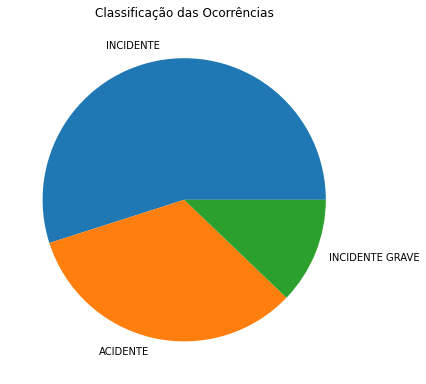

In [11]:
# plotar o gráfico de pizza
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(sizes, labels=labels)
ax.set_title("Classificação das Ocorrências")

plt.tight_layout()

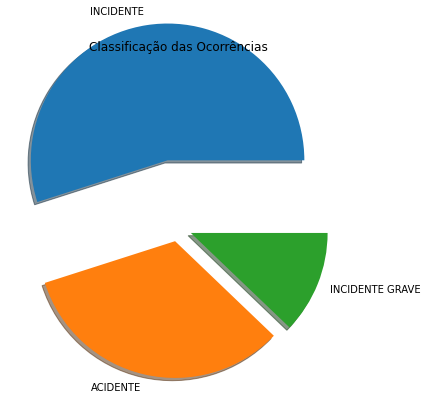

In [14]:
# plotar o gráfico de pizza
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(sizes, explode=explode, labels=labels, shadow=True)
ax.set_title("Classificação das Ocorrências")

plt.tight_layout()

## Donut

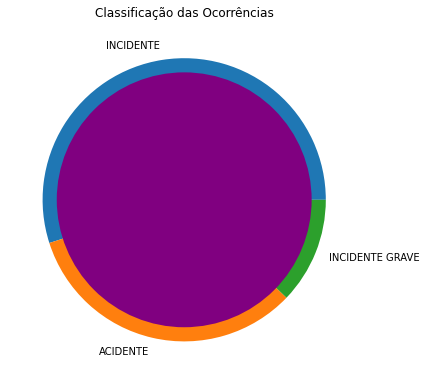

In [23]:
# criando o círculo
donut = plt.Circle((0, 0), 0.90, fc='purple')

# plotar o gráfico de pizza
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(sizes, labels=labels)
ax.set_title("Classificação das Ocorrências")
ax.add_artist(donut)

plt.tight_layout()